In [1]:
# To get Started you must download/Install this Library:

# pip install category_encoders

# OR

# conda install -c conda-forge category_encoders

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import category_encoders as ce
warnings.filterwarnings('ignore')

In [3]:
# Loading the Data:
path = os.getcwd()
load_demographics = pd.read_csv(path + "/" + 'traindemographics.csv')
load_seny = pd.read_csv(path + "/" + 'sendy_logistics.csv')
load_perf = pd.read_csv(path + "/" + 'trainperf.csv')
load_pervloan = pd.read_csv(path + "/" + 'trainprevloans.csv')

In [4]:
load_demographics.sample(3).T

,1682,969,3775
customerid,8a858f335c8d9723015c9bc0a13037d0,8a858e6f5668e01701567fb07dcc076c,8a858e5b5bd99460015be19d989363d3
birthdate,1990-03-15 00:00:00.000000,1987-10-08 00:00:00.000000,1989-07-03 00:00:00.000000
bank_account_type,Savings,Savings,Savings
longitude_gps,3.91248,7.4993,3.34724
latitude_gps,7.42184,5.50869,6.64056
bank_name_clients,Skye Bank,GT Bank,Zenith Bank
bank_branch_clients,NaN,NaN,NaN
employment_status_clients,Permanent,Self-Employed,Permanent
level_of_education_clients,NaN,Graduate,NaN


In [5]:
# We can see NAN in last three rows.
# Now its time to remove these NAN's and replace them with with label using the Missing value Techniques:

# First lets check the count/number of missing value:
load_demographics.isna().sum()

customerid                       0
birthdate                        0
bank_account_type                0
longitude_gps                    0
latitude_gps                     0
bank_name_clients                0
bank_branch_clients           4295
employment_status_clients      648
level_of_education_clients    3759
dtype: int64

In [6]:
# We can see that last three features has lot of missing values.
# Lets explore the classes present in the 'employment_status_clients' feature and.

load_demographics['employment_status_clients'].value_counts()

# We can see permanant has higher count mean its is more prominent class to be used to fill the NAN's:

Permanent        3146
Self-Employed     348
Student           142
Unemployed         57
Retired             4
Contract            1
Name: employment_status_clients, dtype: int64

In [7]:
# fill the missing value using "Mode Filling" as (Permanent) has higher frequency:
load_demographics['employment_status_clients'] = load_demographics['employment_status_clients'].fillna(value='Permanent')

# And Similar for other features:

In [8]:
load_demographics.sample(3).T

,1522,2489,3468
customerid,8a858e255557edfe015559c51f350cc0,8a858f2a5b3f2121015b3f5f26bb38c8,8a858e0256b781d80156c20e3b025c59
birthdate,1990-12-25 00:00:00.000000,1985-05-03 00:00:00.000000,1984-08-13 00:00:00.000000
bank_account_type,Other,Savings,Other
longitude_gps,3.35566,-95.3372,3.39374
latitude_gps,6.5976,29.9355,6.4527
bank_name_clients,GT Bank,GT Bank,First Bank
bank_branch_clients,NaN,NaN,NaN
employment_status_clients,Self-Employed,Permanent,Self-Employed
level_of_education_clients,Graduate,NaN,Post-Graduate


In [9]:
load_demographics['level_of_education_clients'].value_counts()

Graduate         420
Secondary         89
Post-Graduate     68
Primary           10
Name: level_of_education_clients, dtype: int64

In [10]:
load_demographics['level_of_education_clients'] = load_demographics['level_of_education_clients'].fillna(value='Graduate')

In [11]:
load_demographics.sample(3).T

# Same for the other features:

,2248,3505,2122
customerid,8a858ecb5bf33c30015bf65181e41990,8a858e5d5c7e25b4015c7fea66825cfe,8a858fd3552c75620155525f87523b72
birthdate,1990-01-28 00:00:00.000000,1985-07-13 00:00:00.000000,1978-09-15 00:00:00.000000
bank_account_type,Savings,Savings,Savings
longitude_gps,3.46251,3.43832,6.99975
latitude_gps,6.43356,7.18666,4.87395
bank_name_clients,Zenith Bank,GT Bank,Diamond Bank
bank_branch_clients,NaN,NaN,NaN
employment_status_clients,Permanent,Permanent,Self-Employed
level_of_education_clients,Graduate,Graduate,Graduate


In [12]:
# For Numerical features:
#     Filling with mean, mode, median.
#     Temporal filling (backward or forward filling).
#     Use machine learning models: Train a machine learning model to learn the most appropriate fill values.

# To demonstrate that:

In [13]:
load_seny.sample(3).T

# We can see Precipitation in millimeters and Temperature has NAN's or Missing Values:

,5051,3644,15960
Order No,Order_No_14425,Order_No_7427,Order_No_14710
User Id,User_Id_552,User_Id_238,User_Id_3426
Vehicle Type,Bike,Bike,Bike
Platform Type,3,3,3
Personal or Business,Business,Business,Business
Placement - Day of Month,21,25,17
Placement - Weekday (Mo = 1),3,1,7
Placement - Time,11:02:11 AM,1:00:35 PM,11:10:38 AM
Confirmation - Day of Month,21,25,17
Confirmation - Weekday (Mo = 1),3,1,7


In [14]:
# Lets check the data type of that feature/column:

print(load_seny['Precipitation in millimeters'].dtype)
print(load_seny['Temperature'].dtype)

float64
float64


In [15]:
# Lets Start Filling (Temperature) column:

mean_df = round(load_seny['Temperature'].mean())
mode_df = round(load_seny['Temperature'].mode()[0])
median_df = round(load_seny['Temperature'].median())

print('Filling with mean Value of: ', mean_df)
print('Filling with mode Value of: ', mode_df)
print('Filling with median Value of: ', median_df)

# Filling with mean:
load_seny['Temperature'] = load_seny['Temperature'].fillna(value=mean_df)

# Filling with mode:
load_seny['Temperature'] = load_seny['Temperature'].fillna(value=mode_df)

# Filling with median:
load_seny['Temperature'] = load_seny['Temperature'].fillna(value=median_df)

print('\n')
print('NAN\'s Values are: ', load_seny['Temperature'].isna().sum())
print('NAN\'s Values are: ',load_seny['Temperature'].isna().sum())
print('NAN\'s Values are: ',load_seny['Temperature'].isna().sum())

# The calculated mode in Pandas always returns the modal value and its index.
# This means we can have more than one returned modal value. We choose the first one by indexing with [0].

Filling with mean Value of:  23
Filling with mode Value of:  25.0
Filling with median Value of:  24


NAN's Values are:  0
NAN's Values are:  0
NAN's Values are:  0


In [16]:
# Using Modeling to Fill the Missing Value:
# Making a model and based on that model we will fill the missing values:

# We are dealing with Precipitation in millimeters feature and first we will check its corellation with other features by:

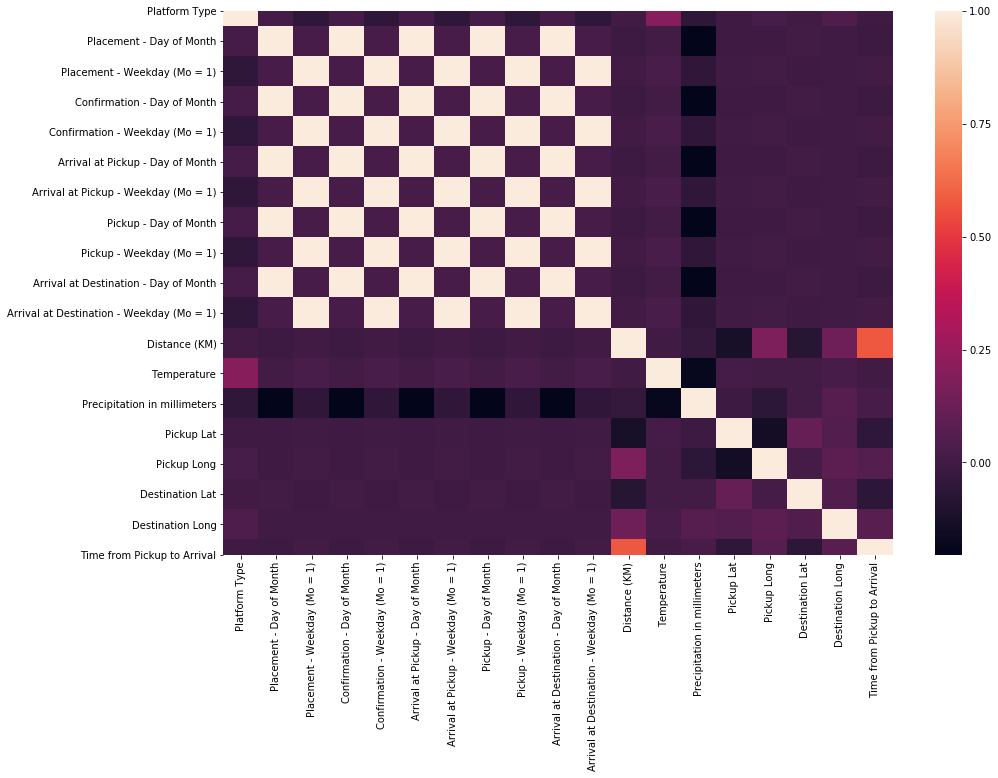

In [17]:
# Plotting heat map of features Correlation:
plt.figure(figsize = (15,10))
sns.heatmap(load_seny.corr())

In [18]:
# We can see that majority of the featires dont correlate with the {Precipitation in millimeters}:

# We will use the last three feature to train the model:

load_seny['Precipitation in millimeters'].isna().sum()

20649

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

to_train = ['Precipitation in millimeters', 'Destination Lat', 'Destination Long', 'Time from Pickup to Arrival']

temp_df = load_seny[to_train]

#Split dataset with missing values and non-missing values as test and train set respectively.
# Missing values data --> for test
# Non_Missing values data --> for Train

x_train = temp_df[temp_df['Precipitation in millimeters'].notnull()].drop(columns='Precipitation in millimeters')
y_train = temp_df[temp_df['Precipitation in millimeters'].notnull()]['Precipitation in millimeters']
x_test = temp_df[temp_df['Precipitation in millimeters'].isnull()].drop(columns='Precipitation in millimeters')

#Fit a simple linear model to the dataset
model.fit(x_train, y_train)
pred = model.predict(x_test)

#print fill values
print(np.round(pred, 5))

#Perform filling
load_seny['Precipitation in millimeters'][load_seny['Precipitation in millimeters'].isnull()] = pred

[8.03056 8.18609 7.86142 ... 8.46164 7.45028 8.60717]


In [20]:
load_seny['Temperature'].isna().sum()

0

In [21]:
# Alternative way to perform the Filling is to Use IterativeImputer from Sklearn:

# Get the index of missing values:
missing_indx = list(load_seny['Temperature'][load_seny['Temperature'].isna()].index)

In [22]:
# Explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Run the imputer with a simple Random Forest estimator
imp = IterativeImputer(RandomForestRegressor(n_estimators=5), max_iter=5, random_state=1)
to_train = ['Temperature', 'Destination Lat', 'Destination Long','Time from Pickup to Arrival']

# Perform filling
load_seny[to_train] = pd.DataFrame(imp.fit_transform(load_seny[to_train]), columns=to_train)

# Display some of the filled values
load_seny['Temperature'][missing_indx].head(10)

Series([], Name: Temperature, dtype: float64)

In [23]:
# First, we explicitly require and enable the IterativeImputer function. This must be done before you can use it.
# Next, we specify the list of correlated features as a Python list.
# Finally, we fit transform and convert the result to a Pandas dataframe.

## How to handle categorical features

In [24]:
# Categorical features are features that can take on values from a limited set. For example, the relative hotness
# of a place/thing (hot, hotter, hottest) or star ratings for an application (1,2,3,4,5)

In [25]:
# In regards to our dataset, features like {level_of_education_clients} in the {load_demographics} dataset is a categorical
# feature containing classes like [Secondary, Graduate, Post-Graduate, and Primary].

In [26]:
# Machine learning models cannot work with categorical features the way they are. These features must be converted to 
# numerical forms before they can be used. The process of converting categorical features to numerical
# form is called encoding

# There are numerous types of encoding, and the choice of which kind to use is mostly dependent on the categorical type:

# Types of categorical features

In [27]:
# Ordinal Categorical Features: Ordinal categorical features have a natural ordered category.
# That is, one class is higher than another.
#     For example, star ratings (1,2,3,4,5), where class 5 is a higher rating than 4/3/2/1.

In [28]:
# Manual Encoding of Ordinal Feature:

# If the classes in a categorical feature are ordinal, and the unique values are small,then you can manually assign
# labels that have some form of ordering.

'''Lets do some Practical Work'''

'Lets do some Practical Work'

In [29]:
load_demographics['level_of_education_clients'].unique()

array(['Graduate', 'Secondary', 'Post-Graduate', 'Primary'], dtype=object)

In [30]:
# Using a Simple Map Function:

map_education = {"Primary" : 1, "Secondary": 2, "Graduate": 3, "Post-Graduate": 4}

load_demographics['level_of_education_clients'] = load_demographics['level_of_education_clients'].map(map_education)
load_demographics['level_of_education_clients'].value_counts()

3    4179
2      89
4      68
1      10
Name: level_of_education_clients, dtype: int64

In [31]:
# First, we create a dictionary mapping classes to their labels. Here, the highest class (Post-Graduate) is
# assigned the highest number.
# Next, we use the Pandas map function to find and replace every class with its corresponding label.

In [32]:
# To perform automated encoding, we’ll use an efficient library called {categorical_encoders}:

In [33]:
# To install this Library:

# pip install category_encoders
# OR
# conda install -c conda-forge category_encoders

In [34]:
# Check the number of unique classes
categorical_cols = load_demographics.select_dtypes(include='object').columns
for col in categorical_cols:
    print("Number of classes in {}".format(col))
    print(load_demographics[col].nunique())
    print('--------------------------')

Number of classes in customerid
4334
--------------------------
Number of classes in birthdate
3297
--------------------------
Number of classes in bank_account_type
3
--------------------------
Number of classes in bank_name_clients
18
--------------------------
Number of classes in bank_branch_clients
45
--------------------------
Number of classes in employment_status_clients
6
--------------------------


In [35]:
# Label Encoding:
#     If you have a large number of classes in a categorical feature, you can use label encoding.

In [36]:
# The OrdinalEncoder function in the categorical_encoders library can be used to label encode:

#Label encoding
categorical_cols = ['bank_name_clients', 'bank_branch_clients']
encoder = ce.OrdinalEncoder(cols=categorical_cols)
load_demographics = encoder.fit_transform(load_demographics)

In [37]:
# One-Hot Encoding:
#     One-hot encoding uses binary values to represent classes. It creates a feature per category,
#     and can quickly become inefficient as the number of classes in the categorical feature increases.

In [38]:
categories = ['bank_account_type','level_of_education_clients']
one_hot_enc = ce.OneHotEncoder(cols=categories)
load_demographics = one_hot_enc.fit_transform(load_demographics)
load_demographics.head().T

,0,1,2,3,4
customerid,8a858e135cb22031015cbafc76964ebd,8a858e275c7ea5ec015c82482d7c3996,8a858e5b5bd99460015bdc95cd485634,8a858efd5ca70688015cabd1f1e94b55,8a858e785acd3412015acd48f4920d04
birthdate,1973-10-10 00:00:00.000000,1986-01-21 00:00:00.000000,1987-04-01 00:00:00.000000,1991-07-19 00:00:00.000000,1982-11-22 00:00:00.000000
bank_account_type_1,1,1,1,1,1
bank_account_type_2,0,0,0,0,0
bank_account_type_3,0,0,0,0,0
longitude_gps,3.31922,3.3256,5.7461,3.36285,8.45533
latitude_gps,6.5286,7.1194,5.56317,6.64249,11.9714
bank_name_clients,1,2,3,1,1
bank_branch_clients,1,1,1,1,1
employment_status_clients,Permanent,Permanent,Permanent,Permanent,Permanent


In [39]:
# Hash Encoding:
#     Hash encoding or feature hashing is a fast and space-efficient way of encoding features. It’s very
#     efficient for categorical features with large numbers of classes. A hash encoder works by applying a hash function
#     to the features

In [40]:
cat_cols = ['bank_name_clients', 'bank_branch_clients']
hash_enc = ce.HashingEncoder(cols=cat_cols, n_components=10)
load_demographics = hash_enc.fit_transform(load_demographics)
load_demographics.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,bank_account_type_1,bank_account_type_2,bank_account_type_3,longitude_gps,latitude_gps,employment_status_clients,level_of_education_clients_1,level_of_education_clients_2,level_of_education_clients_3,level_of_education_clients_4
0,0,2,0,0,0,0,0,0,0,0,...,1,0,0,3.319219,6.528604,Permanent,1,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,1,0,0,3.325598,7.119403,Permanent,1,0,0,0
2,0,1,0,1,0,0,0,0,0,0,...,1,0,0,5.746100,5.563174,Permanent,1,0,0,0
3,0,2,0,0,0,0,0,0,0,0,...,1,0,0,3.362850,6.642485,Permanent,1,0,0,0
4,0,2,0,0,0,0,0,0,0,0,...,1,0,0,8.455332,11.971410,Permanent,1,0,0,0


In [41]:
# First, we specify the features we want to hash encode.
# Next, we create a hash encoder object and specify the length of the hash vector to be used.
# Finally, we fit-transform the dataset.

In [42]:
# Target Encoding:
#     In target encoding, we calculate the average of the target value by a specific category and
#     replace that categorical feature with the result. Target encoding helps preserve useful properties of the
#     feature and can sometimes help improve classification models—however, it can sometimes lead to severe overfitting

In [43]:
# The target of interest in this dataset is the good_bad_flag feature, and the task is to predict if a customer will
# repay a loan or not. The feature good_bad_flag is represented as a categorical feature, so we first convert it to
# numerical form.

In [44]:
# To demonstrate target encoding:
map_target = {"Good": 0, "Bad": 1}
load_perf['good_bad_flag'] = load_perf['good_bad_flag'].map(map_target)

In [45]:
# Next, we’ll target encode the feature loannumber:

target_enc = ce.TargetEncoder(cols=['loannumber'])
loan_perf = target_enc.fit_transform(X=loan_perf, y=loan_perf['good_bad_flag'])
loan_perf.head().T

# First, we create a target encoder object and pass the column(s) we want to encode.
# Next, we fit-transform the dataset by passing both the features and the target of interest.

NameError: name 'loan_perf' is not defined

# How to handle numerical/continuous features

In [46]:
# Numerical/Continuous features are the most common type of features found in datasets:

# Feature engineering on numerical data mostly depends on domain knowledge:

In [47]:
# Log Transformation:
#     Log transformation helps to center (or in statistical terms normally distribute) data.
#     This strategy can help most machine learning models perform better.

# If you log transform the target feature, always take the exponent at the end of the analysis when interpreting the result.

'''Log transformations are mostly performed on skewed features. Features can either be left or right skewed. Skewness can
be easily checked by visualization.'''

'Log transformations are mostly performed on skewed features. Features can either be left or right skewed. Skewness can\nbe easily checked by visualization.'

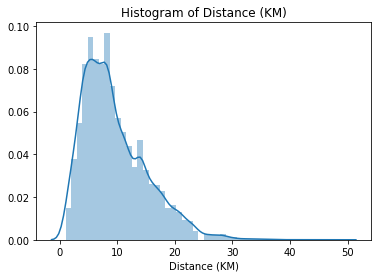

In [48]:
# To demonstrate log transformation:

sns.distplot(load_seny['Distance (KM)'])
plt.title("Histogram of Distance (KM)")
plt.show()

# You can See the feature is Right Skewed:

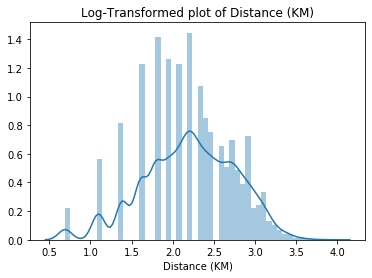

In [49]:
load_seny['Distance (KM)'] =  np.log1p(load_seny['Distance (KM)'])
sns.distplot(load_seny['Distance (KM)'])
plt.title("Log-Transformed plot of Distance (KM)")
plt.show()

# We log transform by taking the logarithm of all the instances. We use the efficient NumPy implementation, which
# adds 1 to every value before taking the logarithm. This helps us to avoid taking log of zero

In [50]:
# Using Domain Knowledge:
'''    If you have domain expertise or have someone with domain expertise on your team, you can come up with new features
    that can greatly help your machine learning models.'''

# To demostrate this:

'    If you have domain expertise or have someone with domain expertise on your team, you can come up with new features\n    that can greatly help your machine learning models.'

In [51]:
# 1) Interest elapsed:
#         Interest elapsed is a feature we create from the difference between the totaldue and the loanamount.

load_pervloan['interest_elapsed'] = load_pervloan['totaldue'] - load_pervloan['loanamount']

In [52]:
# 2) Loan count:
#         We can calculate the total number of loans collected by a customer by aggregating loan numbers.

#Groupby customer id and calculate their total loans taken
loadnumber_count = load_pervloan.groupby(by='customerid').agg(['count'])[['loannumber']].reset_index()

#merge back to dataset on customer_id
load_pervloan = load_pervloan.merge(right=loadnumber_count, how='left', on='customerid')
load_pervloan.head()

,Unnamed: 0,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate,interest_elapsed,"(loannumber, count)"
0,0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000,3000.0,11
1,1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000,3000.0,11
2,2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000,3800.0,11
3,3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000,1500.0,6
4,4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000,1500.0,2


# Polynomial (Cross) Features:

In [53]:
# Polynomial features create interactions among features. They help to capture relationships among independent variables
# and can help decrease the bias of a machine learning model, as long as it’s not contributing to massive overfitting.

# We can create polynomial/cross features manually by simply adding, multiplying, or dividing features with each other.

#Use Sklearn Polynomial Features
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
to_cross = ['loannumber', 'totaldue', 'termdays']
crossed_feats = poly.fit_transform(load_pervloan[to_cross].values)

#Convert to Pandas DataFrame and merge to original dataset
crossed_feats = pd.DataFrame(crossed_feats)
load_pervloan = pd.concat([load_pervloan, crossed_feats], axis=1)

load_pervloan.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
customerid,8a2a81a74ce8c05d014cfb32a0da1049,8a2a81a74ce8c05d014cfb32a0da1049,8a2a81a74ce8c05d014cfb32a0da1049,8a8588f35438fe12015444567666018e,8a85890754145ace015429211b513e16
systemloanid,301682320,301883808,301831714,301861541,301941754
loannumber,2,9,8,5,2
approveddate,2016-08-15 18:22:40.000000,2017-04-28 18:39:07.000000,2017-03-05 10:56:25.000000,2017-04-09 18:25:55.000000,2017-06-17 09:29:57.000000
creationdate,2016-08-15 17:22:32.000000,2017-04-28 17:38:53.000000,2017-03-05 09:56:19.000000,2017-04-09 17:25:42.000000,2017-06-17 08:29:50.000000
loanamount,10000,10000,20000,10000,10000
totaldue,13000,13000,23800,11500,11500
termdays,30,30,30,15,15
closeddate,2016-09-01 16:06:48.000000,2017-05-28 14:44:49.000000,2017-04-26 22:18:56.000000,2017-04-24 01:35:52.000000,2017-07-14 21:18:43.000000


# Normalization of Features

In [54]:
'''Normalization helps change the values of numeric features to a common scale, without distorting differences in the
range of values or losing information. Normalization is very important for distance-based models like KNNs, and it
also helps speed up training in neural networks.'''

# Some normalization functions available in sklearn include:
    
#         1) StandardScaler: Standardize features by subtracting the mean and scaling to unit variance.
#         2) RobustScaler: Scale features using statistics that are robust to outliers.
#         3) MinMaxScaler: Normalize features by scaling each feature to a specified range (range depends on you!).

# Note:
'''    You should never fit your scaler to the test/validation set. This can cause leakages. Also, scalers in sklearn are
    not robust to missing values, which means you should always fill missing values before attempting to use the scalers.'''

from sklearn.preprocessing import StandardScaler

feats = ['loannumber', 'totaldue', 'termdays']
sc = StandardScaler()
sc_data = sc.fit_transform(load_pervloan[feats])
sc_data

array([[-0.67377132, -0.62877649,  0.30213166],
       [ 1.48047238, -0.62877649,  0.30213166],
       [ 1.17272328,  0.40432506,  0.30213166],
       ...,
       [-0.05827312, -0.62877649,  0.30213166],
       [-0.98152042, -0.62877649,  0.30213166],
       [-0.67377132, -0.62877649,  0.30213166]])

In [55]:
from sklearn.preprocessing import RobustScaler
robsc = RobustScaler()

rb_data = robsc.fit_transform(load_pervloan[feats])
rb_data

array([[-0.25      ,  0.        ,  0.        ],
       [ 1.5       ,  0.        ,  0.        ],
       [ 1.25      ,  0.83076923,  0.        ],
       ...,
       [ 0.25      ,  0.        ,  0.        ],
       [-0.5       ,  0.        ,  0.        ],
       [-0.25      ,  0.        ,  0.        ]])

In [56]:
from sklearn.preprocessing import MinMaxScaler

minsc = MinMaxScaler(feature_range=(0,2))
minmax_data = minsc.fit_transform(load_pervloan[feats])
minmax_data

array([[0.08      , 0.29543697, 0.4       ],
       [0.64      , 0.29543697, 0.4       ],
       [0.56      , 0.6295437 , 0.4       ],
       ...,
       [0.24      , 0.29543697, 0.4       ],
       [0.        , 0.29543697, 0.4       ],
       [0.08      , 0.29543697, 0.4       ]])

# Working with date features

In [57]:
'''Date features are a popular type of feature present in many datasets. These features are temporal in nature and
require specific feature extraction techniques.'''

'Date features are a popular type of feature present in many datasets. These features are temporal in nature and\nrequire specific feature extraction techniques.'

In [58]:
# Time Elapsed:
'''Time elapsed is the difference in time between two dates.'''

'Time elapsed is the difference in time between two dates.'

In [59]:
#First convert to pandas datetime format
load_perf['approveddate'] = pd.to_datetime(load_perf['approveddate'])
load_perf['creationdate'] = pd.to_datetime(load_perf['creationdate'])
load_perf['date_elapsed_in_secs'] = (load_perf['approveddate'] - load_perf['creationdate']) / np.timedelta64(1,'s') #can subtitute with [h,m,s]
load_perf.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,date_elapsed_in_secs
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,NaN,0,3609.0
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,NaN,0,3623.0
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,NaN,0,3606.0
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,NaN,0,3606.0
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,NaN,0,3606.0


In [60]:
# Extract Date Features:

#First convert to pandas datetime format
load_perf['approveddate'] = pd.to_datetime(load_perf['approveddate'])

#use pandas built in functions
load_perf['approved_day'] = load_perf['approveddate'].dt.day
load_perf['approved_week'] = load_perf['approveddate'].dt.week
load_perf['approved_hour'] = load_perf['approveddate'].dt.hour
load_perf.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,date_elapsed_in_secs,approved_day,approved_week,approved_hour
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,NaN,0,3609.0,25,30,8
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,NaN,0,3623.0,5,27,17
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,NaN,0,3606.0,6,27,14
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,NaN,0,3606.0,27,30,19
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,NaN,0,3606.0,3,27,23


In [61]:
# Period of the day:
'''We can extract the period of the day (morning, afternoon, evenings) from a date feature by manually mapping the
hours of a day to the period'''

def map_hours(x):
    if x in [0,1,2,3,4,5,6,7,8,9,10,11,12]:
        return 'morning'
    elif x in [13,14,15,16]:
        return 'afternoon'
    else:
        return 'evening'
    
load_perf['period_of_day'] = load_perf['approved_hour'].map(map_hours)
load_perf.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,date_elapsed_in_secs,approved_day,approved_week,approved_hour,period_of_day
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,NaN,0,3609.0,25,30,8,morning
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,NaN,0,3623.0,5,27,17,evening
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,NaN,0,3606.0,6,27,14,afternoon
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,NaN,0,3606.0,27,30,19,evening
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,NaN,0,3606.0,3,27,23,evening


# Working with latitudes and longitudes:

In [62]:
'''Geo-based features are a class of features present in range of datasets. These features contain records about the
geographical location of a place/point in space. Features like Longitudes, Latitudes, and Address are geo-features
that need to be engineered'''

'''There are numerous things that we can do with latitude and longitude features. We can use libraries like Geojson or Geopy
to convert these numerical values to physical addresses on a map.'''

'''But these methods are slow and don’t really scale to a large number of features. But we’ll bypass these
methods in favor of demonstrating simpler and quicker ways to extract features from longitudes and latitudes.'''

'But these methods are slow and don’t really scale to a large number of features. But we’ll bypass these\nmethods in favor of demonstrating simpler and quicker ways to extract features from longitudes and latitudes.'

In [63]:
# Manhattan distance:

'''The Manhattan distance is the sum of the horizontal and vertical distance between two points. Let’s demonstrate this
below using the Sendy dataset:'''

#Manhattan distnace
def manhattan_distance(lat1, lng1, lat2, lng2):
    a = np.abs(lat2 -lat1)
    b = np.abs(lng1 - lng2)
    return a + b
load_seny['manhattan_dist'] = manhattan_distance(load_seny['Pickup Lat'].values, load_seny['Pickup Long'].values,
                                              load_seny['Destination Lat'].values, load_seny['Destination Long'].values)
load_seny.head()

# First, we write a function to calculate the Manhattan distance. This is implemented in base NumPy.
# Next, we used the function created to calculate the Manhattan distance between Pickup and Destination.

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,manhattan_dist
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,1.609438,20.4,8.030560,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745.0,0.017978
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,2.833213,26.4,8.186094,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993.0,0.141406
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,1.386294,23.0,7.861419,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455.0,0.022588
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,2.302585,19.2,7.503464,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341.0,0.061487
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,2.302585,15.4,7.725474,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214.0,0.046143


In [64]:
# Haversine distance:
    
'''The Haversine distance is the great-circle distance between two points on a sphere, given their longitudes and
latitudes. It’s very important in navigation.'''

#Haversine distance
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h
load_seny['haversine_dist'] = haversine_array(load_seny['Pickup Lat'].values, load_seny['Pickup Long'].values,
                                                   load_seny['Destination Lat'].values, load_seny['Destination Long'].values)
load_seny.head()

# First, we write a function to calculate the Harversine distance. This is also implemented in base NumPy.
# Next, we use the function to calculate the Harversine distance between Pickup and Destination.

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,manhattan_dist,haversine_dist
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,20.4,8.030560,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745.0,0.017978,1.930333
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,26.4,8.186094,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993.0,0.141406,11.339849
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,23.0,7.861419,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455.0,0.022588,1.880079
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,19.2,7.503464,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341.0,0.061487,4.943458
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,15.4,7.725474,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214.0,0.046143,3.724829


In [65]:
# Bearing:

'''The bearing is the compass direction used to travel from a starting point, and must be within the range 0 to 360.'''

#Bearing
def bearing_array(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    return np.degrees(np.arctan2(y, x))
load_seny['bearing'] = bearing_array(load_seny['Pickup Lat'].values, load_seny['Pickup Long'].values,
                                                   load_seny['Destination Lat'].values, load_seny['Destination Long'].values)
load_seny.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,manhattan_dist,haversine_dist,bearing
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,8.030560,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745.0,0.017978,1.930333,-2.076903
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,8.186094,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993.0,0.141406,11.339849,-56.392163
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,7.861419,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455.0,0.022588,1.880079,-64.183866
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,7.503464,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341.0,0.061487,4.943458,-57.091553
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,7.725474,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214.0,0.046143,3.724829,148.114398


In [66]:
# Center point:
    
'''We can calculate the mid-point between two points from their latitudes and longitudes. This can be done by adding the
points and dividing the result by 2.'''

#Get center of lat and longitude
load_seny['center_latitude'] = (load_seny['Pickup Lat'].values + load_seny['Destination Lat'].values) / 2
load_seny['center_longitude'] = (load_seny['Pickup Long'].values + load_seny['Destination Long'].values) / 2
load_seny.head()

'''First, we calculate the center latitude by adding Pickup Latitude with Destination Latitude, and then dividing the
result by 2. We do the same for the Pickup Longitude and Destination Longitude.'''

'First, we calculate the center latitude by adding Pickup Latitude with Destination Latitude, and then dividing the\nresult by 2. We do the same for the Pickup Longitude and Destination Longitude.'

In [67]:
'''Feature engineering is essential and is often the difference between a good machine learning model and the best
machine learning model.'''

'Feature engineering is essential and is often the difference between a good machine learning model and the best\nmachine learning model.'